In [152]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [153]:
csvs = sorted(os.listdir('./csv_data/'), reverse=True)

In [154]:
data = pd.DataFrame(columns = ['CCAA', 'fecha', 'casos', 'IA', 'UCI', 'muertes'])
for csv in csvs:
    data_int = pd.read_csv('./csv_data/{}'.format(csv))
    data = data.append(data_int, ignore_index=True).reset_index(drop=True)

Corregir error primera muerte C. Valenciana

In [161]:
data.loc[data.loc[data.CCAA == '1'].index -1, 'muertes'] = 1
data = data.drop(data.loc[data.CCAA == '1'].index).reset_index(drop=True)

Único nombre para Castilla y La Mancha

In [162]:
data.loc[data.CCAA == 'Castilla-LaMancha', 'CCAA'] = 'CastillaLaMancha'

Damos formato a las columnas

In [163]:
data['fecha'] = pd.to_datetime(data['fecha'],format='%d.%m.%Y')
data['casos'] = pd.to_numeric(data.casos)
data['UCI'] = pd.to_numeric(data.UCI)
data['muertes'] = pd.to_numeric(data.muertes)

# Gráficos

## Casos / CCAA

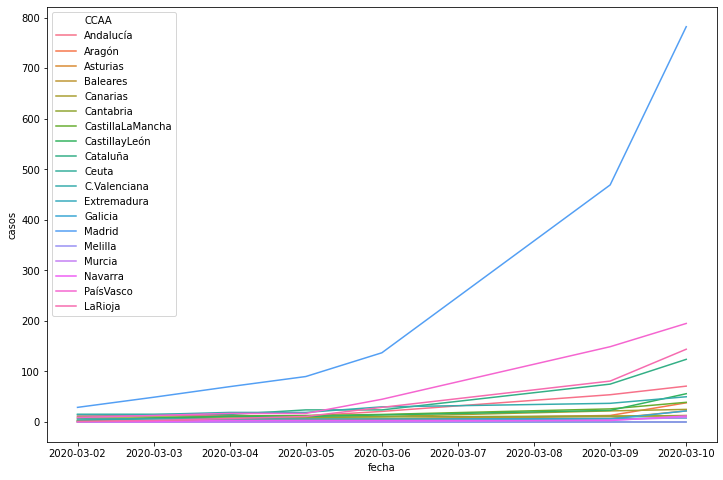

In [164]:
plt.figure(figsize=(12,8))
sns.lineplot(x="fecha", y="casos", hue='CCAA', data=data);

## Incidencia acumulada / CCAA

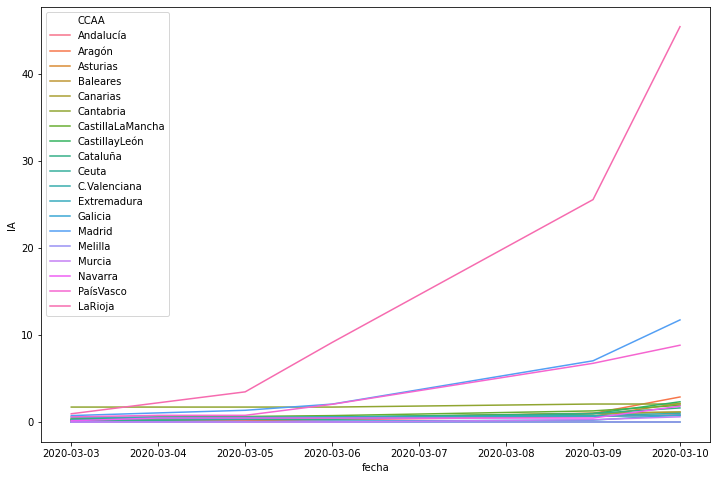

In [186]:
plt.figure(figsize=(12,8))
sns.lineplot(x="fecha", y="IA", hue='CCAA', data=data);

## UCI / CCAA

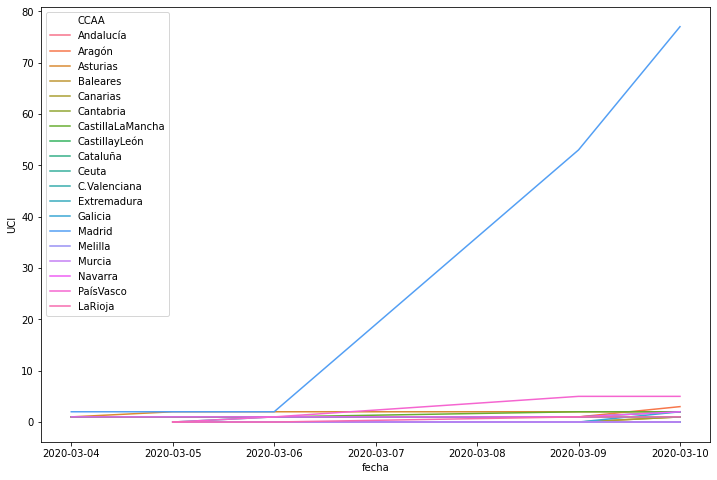

In [187]:
plt.figure(figsize=(12,8))
sns.lineplot(x="fecha", y="UCI", hue='CCAA', data=data);

## Muertes / CCAA

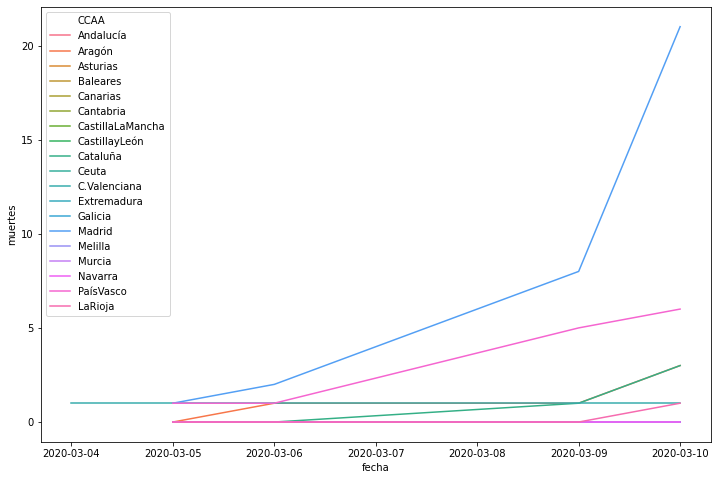

In [167]:
plt.figure(figsize=(12,8))
sns.lineplot(x="fecha", y="muertes", hue='CCAA', data=data);

# SIR MODEL MADRID

*Modelo en desarrollo > No tener en cuenta los valores*

In [168]:
data[data.CCAA == 'Madrid'].sort_values('fecha')

,CCAA,fecha,casos,IA,UCI,muertes
108,Madrid,2020-03-02,29,NaN,NaN,NaN
89,Madrid,2020-03-03,49,0.74,NaN,NaN
70,Madrid,2020-03-04,70,1.05,2.0,NaN
51,Madrid,2020-03-05,90,1.35,2.0,1.0
32,Madrid,2020-03-06,137,2.06,2.0,2.0
13,Madrid,2020-03-09,469,7.04,53.0,8.0
127,Madrid,2020-03-10,782,11.74,77.0,21.0


In [182]:
# Total population, N.
N = 2000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 782, 12
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 2.5, 1./14
# A grid of time points (in days)
t = np.linspace(0, 7, 160)

In [183]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [184]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

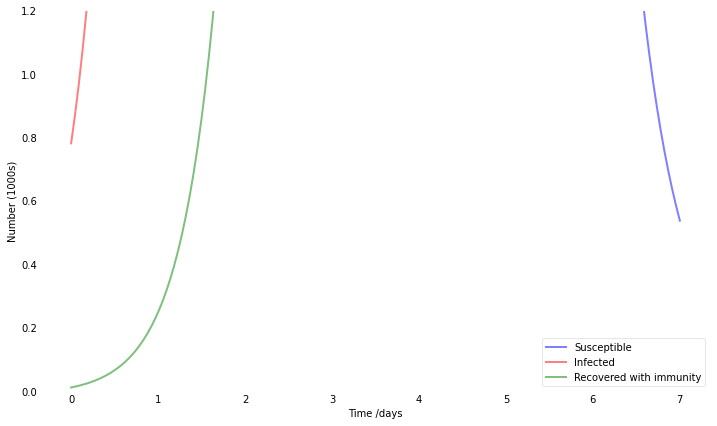

In [185]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12,7))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()